In [1]:
import pandas as pd

In [6]:
sbi=pd.read_csv('SBI_Life_insurance.csv')

In [7]:
sbi.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


In [8]:
sbi.isna().sum()

age               0
sex               0
bmi               0
children          0
smoker            0
region            0
charges           0
insuranceclaim    0
dtype: int64

In [9]:
x=sbi.iloc[:,0:-1]
x.shape

(1338, 7)

In [10]:
y=sbi.iloc[:,-1]
y.shape

(1338,)

In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1)

In [12]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [13]:
lr.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [14]:
y_pred=lr.predict(x_test)

In [15]:
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred))

0.8


In [16]:
confusion=metrics.confusion_matrix(y_test, y_pred)
print(confusion)

[[ 92  40]
 [ 27 176]]


In [17]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.70      0.73       132
           1       0.81      0.87      0.84       203

    accuracy                           0.80       335
   macro avg       0.79      0.78      0.79       335
weighted avg       0.80      0.80      0.80       335



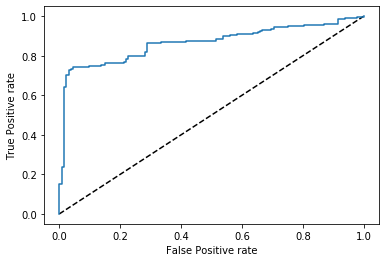

In [25]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
y_pred_prob=lr.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Logistic Regression')
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')

plt.show()

In [26]:
auc_score=metrics.roc_auc_score(y_test,lr.predict(x_test))
print(auc_score)

0.7819823854306613


In [27]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(x_train,y_train)
predgnb=gnb.predict(x_test)
print(accuracy_score(y_test,predgnb))
print(confusion_matrix(y_test,predgnb))
print(classification_report(y_test,predgnb))

0.746268656716418
[[119  13]
 [ 72 131]]
              precision    recall  f1-score   support

           0       0.62      0.90      0.74       132
           1       0.91      0.65      0.76       203

    accuracy                           0.75       335
   macro avg       0.77      0.77      0.75       335
weighted avg       0.80      0.75      0.75       335



In [28]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)
preddtc=dtc.predict(x_test)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

0.9880597014925373
[[130   2]
 [  2 201]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       132
           1       0.99      0.99      0.99       203

    accuracy                           0.99       335
   macro avg       0.99      0.99      0.99       335
weighted avg       0.99      0.99      0.99       335



In [29]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
knn.score(x_train,y_train)
predknn=knn.predict(x_test)
print(accuracy_score(y_test,predknn))
print(confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))

0.6597014925373135
[[ 61  71]
 [ 43 160]]
              precision    recall  f1-score   support

           0       0.59      0.46      0.52       132
           1       0.69      0.79      0.74       203

    accuracy                           0.66       335
   macro avg       0.64      0.63      0.63       335
weighted avg       0.65      0.66      0.65       335



In [30]:
from sklearn.svm import SVC
svc=SVC(kernel='rbf')
svc.fit(x_train,y_train)
svc.score(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.6268656716417911
[[ 10 122]
 [  3 200]]
              precision    recall  f1-score   support

           0       0.77      0.08      0.14       132
           1       0.62      0.99      0.76       203

    accuracy                           0.63       335
   macro avg       0.70      0.53      0.45       335
weighted avg       0.68      0.63      0.52       335

